[70,195,78,172]

# inisialisasi library

In [2]:
from time import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from os import listdir
from PIL import Image as PImage
import cv2
import numpy
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Path to the root image directory containing sub-directories of images
path="dataset_AA/"

In [5]:

#for directory in os.listdir(path):
#    for file in os.listdir(path+directory):
 #       img=cv2.imread(path+directory+"/"+file)
#print("original size :",img.shape)

#data_slice = [2,225,5,245] # [ ymin, ymax, xmin, xmax]
# to extract the ‘interesting’ part of the image files 
# and avoid use statistical correlation from the background 

# ubah ukuran rasio untuk mengurangi dimensi sampel
#resize_ratio = 2.5

#h = int((data_slice[1] - data_slice[0])/resize_ratio) #ymax - ymin slice, Tinggi gambar dalam float
#w = int((data_slice[3] - data_slice[2])/resize_ratio) #xmax - xmin slice, lebar gambar dalam float
#print("Image dimension after resize (h,w) :", h, w)

for directory in os.listdir(path):
    for file in os.listdir(path+directory):
        img=cv2.imread(path+directory+"/"+file)
        
print('Dimensi Asli : ',img.shape)

scale_percent = 60 # percent of original size
w = int(img.shape[1] * scale_percent / 100)
h = int(img.shape[0] * scale_percent / 100)
dim = (w, h)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Dimensi Ukuran Diubah : ',resized.shape)

n_sample = 0 #Jumlah sampel awal
label_count = 0 #Jumlah label awal
n_classes = 0 #jumlah kelas awal

# komponen PCA
n_components = 19
plt.show()

Dimensi Asli :  (112, 92, 3)
Dimensi Ukuran Diubah :  (67, 55, 3)


In [51]:
#Fitur gambar datar Vektor
X=[]
#Int array dari Label Vektor
Y=[]

target_names = [] #Array untuk menyimpan nama-nama orang

for directory in os.listdir(path):
    for file in os.listdir(path+directory):
        img=cv2.imread(path+directory+"/"+file)
        img=cv2.resize(img, (w,h))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        featurevector=numpy.array(img).flatten()
        X.append(featurevector)
        Y.append(label_count)
        n_sample = n_sample + 1
    target_names.append(directory)
    label_count=label_count+1


    
print("Samples :", n_sample)
print("Class :", target_names)
n_classes = len(target_names)


Samples : 400
Class : ['ade', 'adi', 'agan', 'agung', 'ajay', 'alfi', 'ali', 'alya', 'anisa', 'ari', 'arvin', 'asep', 'aulia', 'ayi', 'Bangkit', 'bayu', 'Darsa', 'dea', 'erna', 'erni', 'fadlan', 'faiz', 'Fuji', 'hendri', 'Heri', 'iwan', 'kiki', 'nia', 'oni', 'orin', 'ridwan', 'riki', 'rudi', 'samsul', 'sandi', 'soni', 'tatan', 'tati', 'uca', 'yusuf']


In [38]:
labels = numpy.array(Y)
data = numpy.array(X)

labels.shape, data.shape

((400,), (400, 3685))

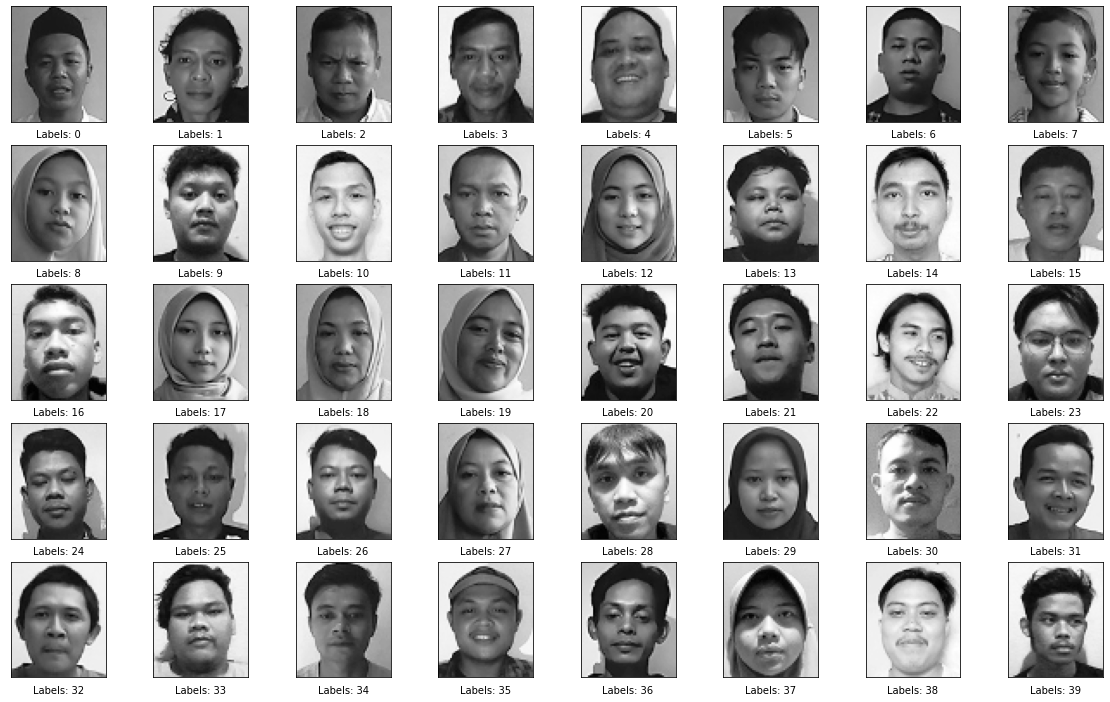

In [52]:
    
plt.figure(figsize=(20,20))
Id=0;

for i in range(40):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[Id].reshape(h,w), cmap=plt.cm.Greys_r)
    plt.xlabel("Labels: {}".format(labels[Id]))
    Id +=10;
plt.show()

# split dataset dan hitung menggunakan PCA

In [53]:
###############################################################################
# Dibagi menjadi satu set pelatihan dan satu set tes menggunakan k fold bertingkat

# dibagi menjadi satu set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=42)

###############################################################################
# hitung PCA (eigenfaces) pada face dataset (diperlakukan sebagai kumpulan data yang tidak berlabel): 
# ekstraksi fitur tanpa pengawasan / pengurangan dimensi

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, len(X_train)))
t0 = time()
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("\n")
print("Memproyeksikan data input pada basis ortonormal eigenfaces")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 19 eigenfaces from 200 faces
done in 0.133s


Memproyeksikan data input pada basis ortonormal eigenfaces
done in 0.028s


In [54]:
# Cek hasil split dataset
X_train_pca.shape, X_test_pca.shape

((200, 19), (200, 19))

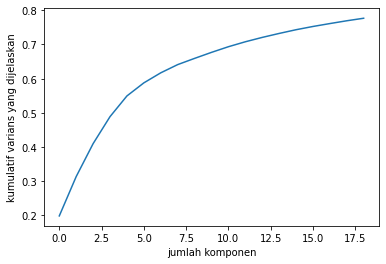

In [55]:
pca = PCA(n_components).fit(X_train)
plt.plot(numpy.cumsum(pca.explained_variance_ratio_))
plt.xlabel('jumlah komponen')
plt.ylabel('kumulatif varians yang dijelaskan');
plt.show()

Hasil perwakilan sempel yang terpilih: 


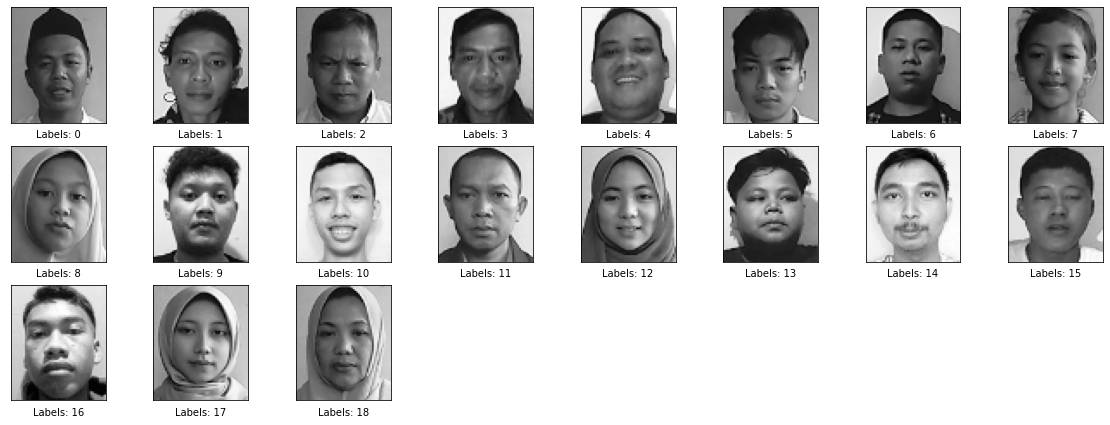

Hasil eigenface dari sempel yang terpilih: 


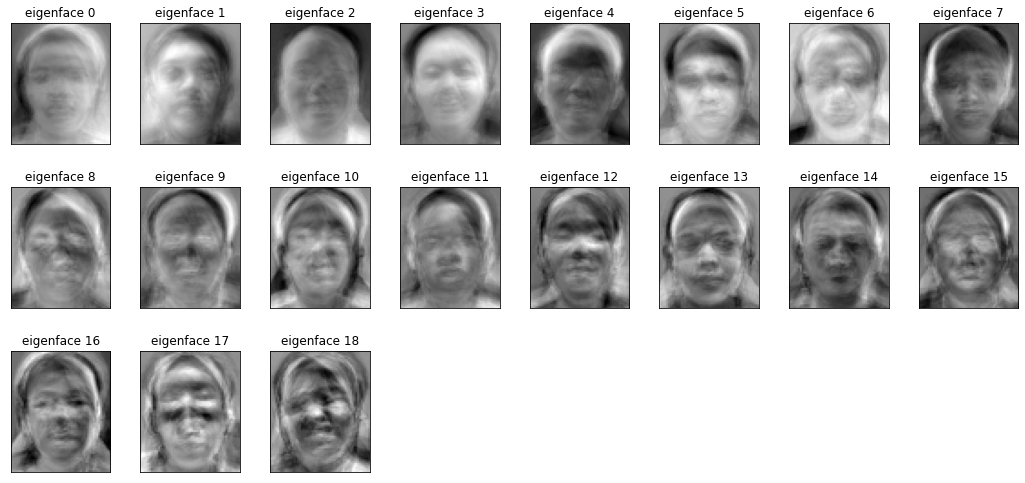

In [56]:
print("Hasil perwakilan sempel yang terpilih: ")

plt.figure(figsize=(20,20))
Id=0;

for i in range(n_components):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[Id].reshape(h,w), cmap=plt.cm.Greys_r)
    plt.xlabel("Labels: {}".format(labels[Id]))
    Id +=10;
plt.show()

print("Hasil eigenface dari sempel yang terpilih: ")
def plot_gallery(images, titles, h, w, n_row=5, n_col=8):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_components):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# latih model SVM

In [57]:
###############################################################################
# Latih model klasifikasi SVM
print("\n")
print("Menyesuaikan pengklasifikasi ke set pelatihan")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, verbose=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))

print("\n")
print("Best estimator ditemukan oleh gridsearchCV : ")
print(clf.best_estimator_)

###############################################################################
# Evaluasi kuantitatif kualitas model pada set tes
print("\n")
print("Memprediksi nama orang di set tes")
t0 = time()
y_pred = clf.predict(X_test_pca)
print(clf.score(X_test_pca,y_test))
print("done in %0.3fs" % ((time() - t0) * 1000)) 




Menyesuaikan pengklasifikasi ke set pelatihan
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=1000.0, gamma=0.0001;, score=0.875 total time=   0.0s
[CV 2/5] END ............C=1000.0, gamma=0.0001;, score=0.850 total time=   0.0s
[CV 3/5] END ............C=1000.0, gamma=0.0001;, score=0.850 total time=   0.0s
[CV 4/5] END ............C=1000.0, gamma=0.0001;, score=0.825 total time=   0.0s
[CV 5/5] END ............C=1000.0, gamma=0.0001;, score=0.900 total time=   0.0s
[CV 1/5] END ............C=1000.0, gamma=0.0005;, score=0.850 total time=   0.0s
[CV 2/5] END ............C=1000.0, gamma=0.0005;, score=0.875 total time=   0.0s
[CV 3/5] END ............C=1000.0, gamma=0.0005;, score=0.900 total time=   0.0s
[CV 4/5] END ............C=1000.0, gamma=0.0005;, score=0.825 total time=   0.0s
[CV 5/5] END ............C=1000.0, gamma=0.0005;, score=0.900 total time=   0.0s
[CV 1/5] END .............C=1000.0, gamma=0.001;, score=0.850 total time=   0.0s

c:\python\python 3.8\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END .............C=1000.0, gamma=0.001;, score=0.875 total time=   0.0s
[CV 3/5] END .............C=1000.0, gamma=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END .............C=1000.0, gamma=0.001;, score=0.825 total time=   0.0s
[CV 5/5] END .............C=1000.0, gamma=0.001;, score=0.900 total time=   0.0s
[CV 1/5] END .............C=1000.0, gamma=0.005;, score=0.850 total time=   0.0s
[CV 2/5] END .............C=1000.0, gamma=0.005;, score=0.875 total time=   0.0s
[CV 3/5] END .............C=1000.0, gamma=0.005;, score=0.900 total time=   0.0s
[CV 4/5] END .............C=1000.0, gamma=0.005;, score=0.825 total time=   0.0s
[CV 5/5] END .............C=1000.0, gamma=0.005;, score=0.900 total time=   0.0s
[CV 1/5] END ..............C=1000.0, gamma=0.01;, score=0.850 total time=   0.0s
[CV 2/5] END ..............C=1000.0, gamma=0.01;, score=0.900 total time=   0.0s
[CV 3/5] END ..............C=1000.0, gamma=0.01;, score=0.900 total time=   0.0s
[CV 4/5] END ..............C

[CV 4/5] END ..............C=50000.0, gamma=0.1;, score=0.825 total time=   0.0s
[CV 5/5] END ..............C=50000.0, gamma=0.1;, score=0.875 total time=   0.0s
[CV 1/5] END ..........C=100000.0, gamma=0.0001;, score=0.850 total time=   0.0s
[CV 2/5] END ..........C=100000.0, gamma=0.0001;, score=0.875 total time=   0.0s
[CV 3/5] END ..........C=100000.0, gamma=0.0001;, score=0.900 total time=   0.0s
[CV 4/5] END ..........C=100000.0, gamma=0.0001;, score=0.825 total time=   0.0s
[CV 5/5] END ..........C=100000.0, gamma=0.0001;, score=0.900 total time=   0.0s
[CV 1/5] END ..........C=100000.0, gamma=0.0005;, score=0.850 total time=   0.0s
[CV 2/5] END ..........C=100000.0, gamma=0.0005;, score=0.875 total time=   0.0s
[CV 3/5] END ..........C=100000.0, gamma=0.0005;, score=0.900 total time=   0.0s
[CV 4/5] END ..........C=100000.0, gamma=0.0005;, score=0.825 total time=   0.0s
[CV 5/5] END ..........C=100000.0, gamma=0.0005;, score=0.900 total time=   0.0s
[CV 1/5] END ...........C=10

In [58]:
print("\nClassification Report : ")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report : 
              precision    recall  f1-score   support

         ade       1.00      0.83      0.91         6
         adi       0.86      1.00      0.92         6
        agan       0.57      1.00      0.73         4
       agung       1.00      1.00      1.00         6
        ajay       0.50      0.67      0.57         3
        alfi       1.00      1.00      1.00         4
         ali       1.00      1.00      1.00         6
        alya       1.00      0.75      0.86         8
       anisa       0.83      1.00      0.91         5
         ari       1.00      1.00      1.00         6
       arvin       0.83      1.00      0.91         5
        asep       0.83      0.71      0.77         7
       aulia       1.00      1.00      1.00         5
         ayi       0.80      1.00      0.89         4
     Bangkit       1.00      0.88      0.93         8
        bayu       1.00      1.00      1.00         6
       Darsa       1.00      1.00      1.00         4
 

In [59]:
print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Confusion Matrix : 
[[5 0 1 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 5]]


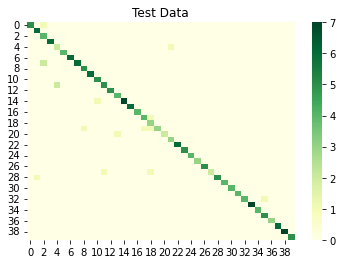

In [60]:
sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=False,fmt='.5g',cmap="YlGn").set_title('Test Data');

test = []

testImage = "test_11/sandi 1.jpg"


testImage=cv2.imread(testImage)
testImage=cv2.resize(testImage, (w,h))
testImage=cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
testImageFeatureVector=numpy.array(testImage).flatten()
test.append(testImageFeatureVector)
testImagePCA = pca.transform(test)
testImagePredict=clf.predict(testImagePCA)


print ("Predicted Name : " + target_names[testImagePredict[0]])

path_testdata = "test_11/"
for file in os.listdir(path_testdata):
    test = []

    filename=path_testdata + file    
    testImage=cv2.imread(filename)
    testImage=cv2.resize(testImage, (w,h))
    testImage=cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
    testImageFeatureVector=numpy.array(testImage).flatten()
    
    test.append(testImageFeatureVector)
    testImagePCA = pca.transform(test)
    testImagePredict=clf.predict(testImagePCA)

    print ("File Source : " + filename)
    print ("Predicted Name : " + target_names[testImagePredict[0]] + "\n")

print (target_names)